In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
import functions as func
import math

import warnings
warnings.filterwarnings('ignore')

rs = 32
data = pd.read_csv('../data/pd_speech_features.csv', skiprows=[0])
data.shape


(756, 755)

<Figure size 360x288 with 0 Axes>

## Check com e sem correlações

In [2]:
corr_data = func.red_correlations(data, tr=0.75)

##########################################################

data_norm = func.normalize(corr_data, ['class','gender'])

##########################################################

data_smote =func.smote_split(data_norm, 'class',random_state=rs)
data_unb = func.split_dataset(data_norm)

len(data_smote)
len(data_unb)

5

<Figure size 432x288 with 0 Axes>

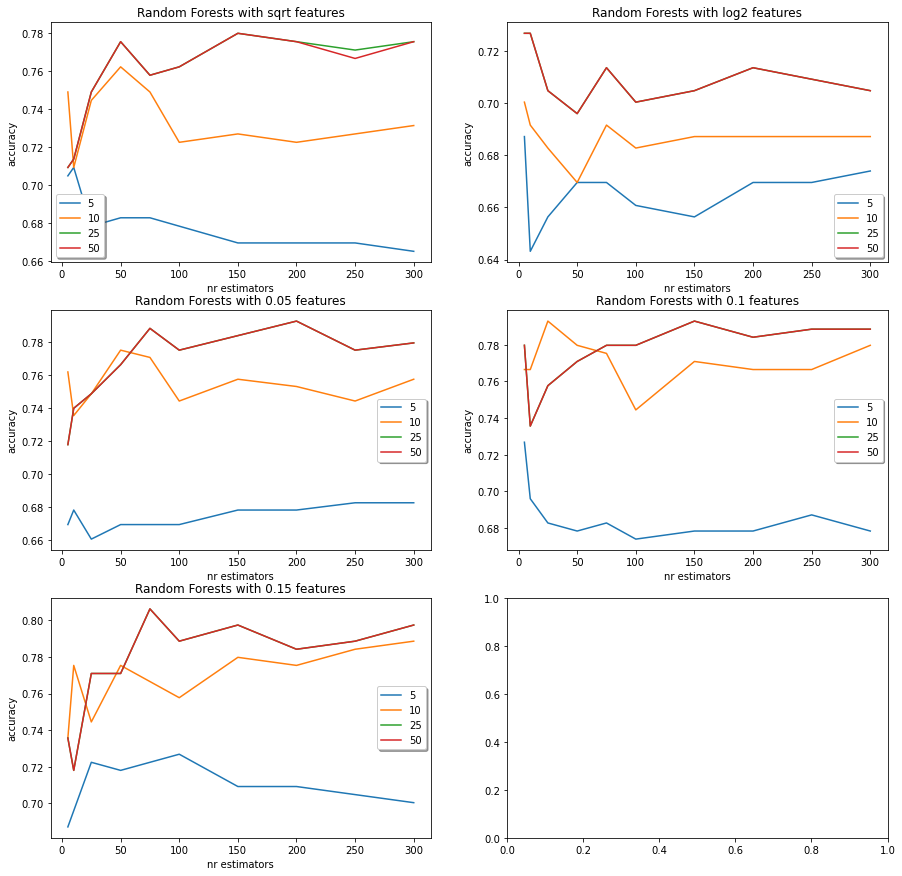

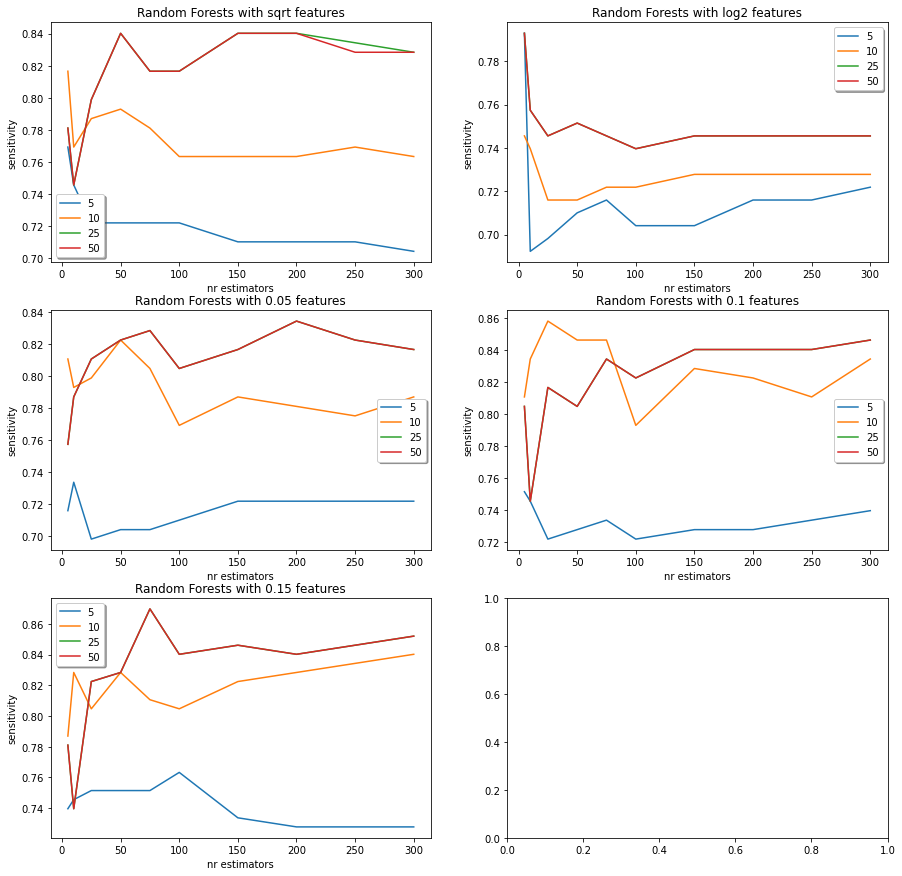

In [3]:

trnX, trnY, tstX, tstY, labels = data_smote
trnY, tstY = trnY.reshape(trnY.shape[0]), tstY.reshape(tstY.shape[0]) 

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25, 50]
max_features = ['sqrt', 'log2', 0.05, 0.1, 0.15]
a= math.ceil(len(max_features)/2)

plt.figure()
fig, axs = plt.subplots(a, 2, figsize=(15, 15), squeeze=False)
fig2, axs2 = plt.subplots(a, 2, figsize=(15, 15), squeeze=False)
for k in range(len(max_features)):
    f = max_features[k]
    values = {}
    svalues = {}
    for d in max_depths:
        yvalues = []
        syvalues = []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f,random_state=rs)
            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            syvalues.append(func.sensitivity(tstY, prdY, labels))
        values[d] = yvalues
        svalues[d] = syvalues
    func.multiple_line_chart(axs[k//2, k%2], n_estimators, values, 'Random Forests with %s features'%f, 'nr estimators', 
                             'accuracy', percentage=False)
    func.multiple_line_chart(axs2[k//2, k%2], n_estimators, svalues, 'Random Forests with %s features'%f, 
                             'nr estimators', 'sensitivity', percentage=False)
    
plt.show()

In [4]:
max_features = 0.15

### {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 0.0015, 'min_samples_split': 3, 'splitter': 'random'}

<Figure size 432x288 with 0 Axes>

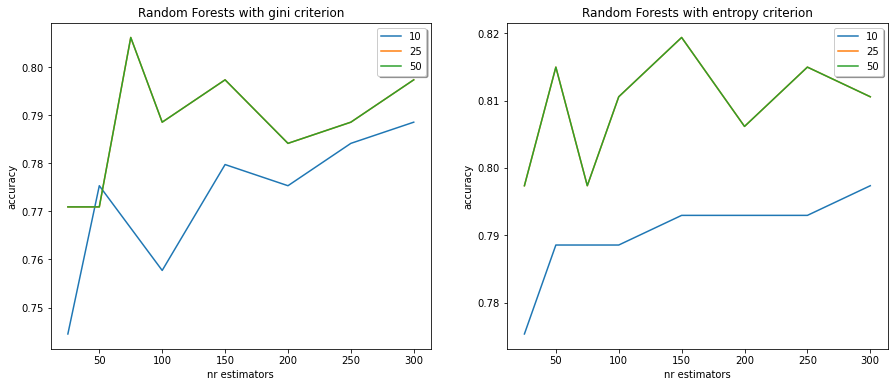

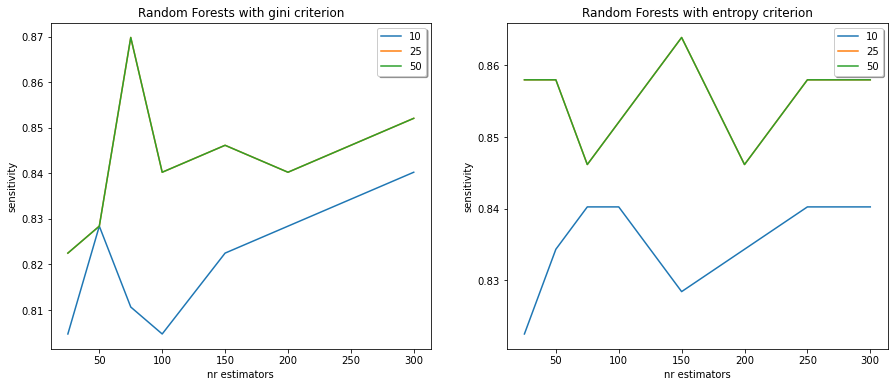

In [5]:
trnX, trnY, tstX, tstY, labels = data_smote
trnY, tstY = trnY.reshape(trnY.shape[0]), tstY.reshape(tstY.shape[0]) 

n_estimators = [25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [10, 25, 50]
criterions = ['gini', 'entropy']


a= math.ceil(len(criterions)/2)
plt.figure()
fig, axs = plt.subplots(a, 2, figsize=(15, 6), squeeze=False)
fig2, axs2 = plt.subplots(a, 2, figsize=(15, 6), squeeze=False)
for k in range(len(criterions)):
    f = criterions[k]
    values = {}
    svalues = {}
    for d in max_depths:
        yvalues = []
        syvalues = []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=max_features, criterion=f,
                                        random_state=rs)
            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            syvalues.append(func.sensitivity(tstY, prdY, labels))
        values[d] = yvalues
        svalues[d] = syvalues
    func.multiple_line_chart(axs[k//2, k%2], n_estimators, values, 'Random Forests with %s criterion'%f, 
                             'nr estimators', 'accuracy', percentage=False)
    func.multiple_line_chart(axs2[k//2, k%2], n_estimators, svalues, 'Random Forests with %s criterion'%f, 
                             'nr estimators', 'sensitivity', percentage=False)
    
plt.show()

In [6]:
criterion = 'entropy'
max_depth = 50

<Figure size 432x288 with 0 Axes>

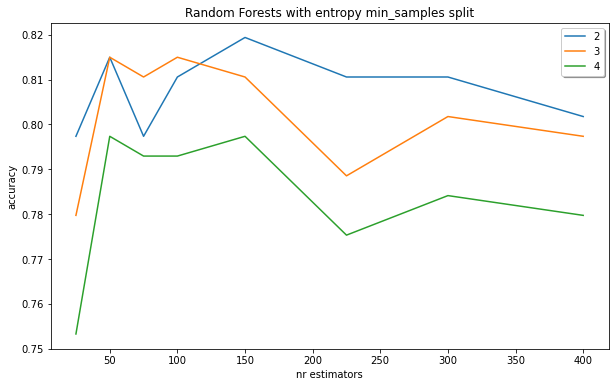

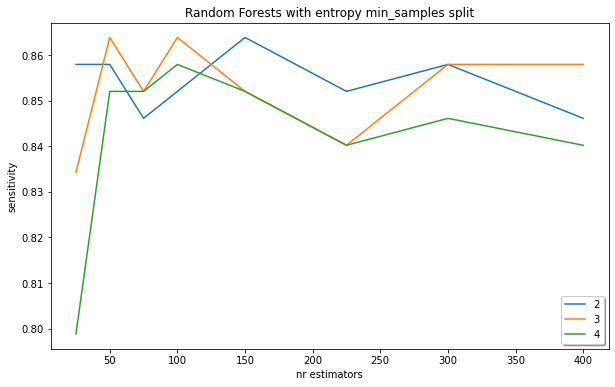

In [7]:
trnX, trnY, tstX, tstY, labels = data_smote
trnY, tstY = trnY.reshape(trnY.shape[0]), tstY.reshape(tstY.shape[0]) 

n_estimators = [25, 50, 75, 100, 150, 225, 300, 400]
min_samples_split = [2, 3, 4]


plt.figure()
fig, axs = plt.subplots(1, 1, figsize=(10, 6), squeeze=False)
fig2, axs2 = plt.subplots(1, 1, figsize=(10, 6), squeeze=False)
values = {}
svalues = {}
for d in min_samples_split:
    yvalues = []
    syvalues = []
    for n in n_estimators:
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, max_features=max_features, 
                                    criterion=criterion, random_state=rs, min_samples_split= d)
        rf.fit(trnX, trnY)
        prdY = rf.predict(tstX)
        yvalues.append(metrics.accuracy_score(tstY, prdY))
        syvalues.append(func.sensitivity(tstY, prdY, labels))
    values[d] = yvalues
    svalues[d] = syvalues
func.multiple_line_chart(axs[0,0], n_estimators, values, 'Random Forests with %s min_samples split'%f, 
                         'nr estimators', 'accuracy', percentage=False)
func.multiple_line_chart(axs2[0, 0], n_estimators, svalues, 'Random Forests with %s min_samples split'%f, 
                             'nr estimators', 'sensitivity', percentage=False)

plt.show()

In [8]:
min_samples_split = 2

<Figure size 432x288 with 0 Axes>

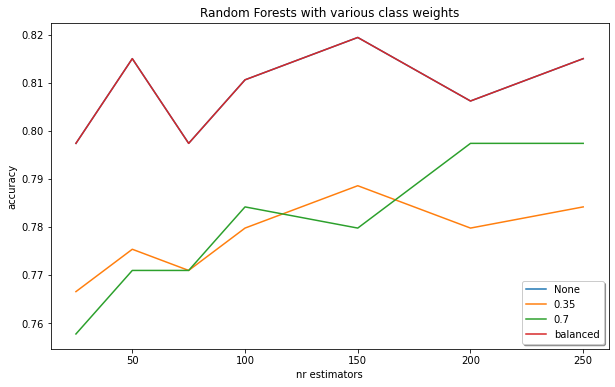

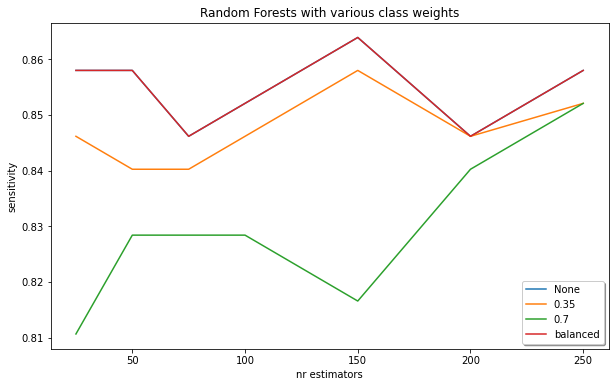

In [9]:
#{class_label: weight}

trnX, trnY, tstX, tstY, labels = data_smote
trnY, tstY = trnY.reshape(trnY.shape[0]), tstY.reshape(tstY.shape[0]) 

n_estimators = [25, 50, 75, 100, 150, 200, 250]
class_weights = [None, {1: 0.35}, {1: 0.70}, "balanced"]
names = ['None', 0.35 ,0.70, "balanced"]

plt.figure()
fig, axs = plt.subplots(1, 1, figsize=(10, 6), squeeze=False)
fig2, axs2 = plt.subplots(1, 1, figsize=(10, 6), squeeze=False)
values = {}
svalues = {}
for i,d in enumerate(class_weights):
    yvalues = []
    syvalues = []
    for n in n_estimators:
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, max_features=max_features, 
                                criterion=criterion, random_state=rs, min_samples_split= min_samples_split,
                                class_weight=d)
        
        rf.fit(trnX, trnY)
        prdY = rf.predict(tstX)
        yvalues.append(metrics.accuracy_score(tstY, prdY))
        syvalues.append(func.sensitivity(tstY, prdY, labels))
    values[names[i]] = yvalues
    svalues[names[i]] = syvalues
func.multiple_line_chart(axs[0,0], n_estimators, values, 'Random Forests with various class weights', 
                         'nr estimators', 'accuracy', percentage=False)
func.multiple_line_chart(axs2[0, 0], n_estimators, svalues, 'Random Forests with various class weights', 
                             'nr estimators', 'sensitivity', percentage=False)

plt.show()

<Figure size 432x288 with 0 Axes>

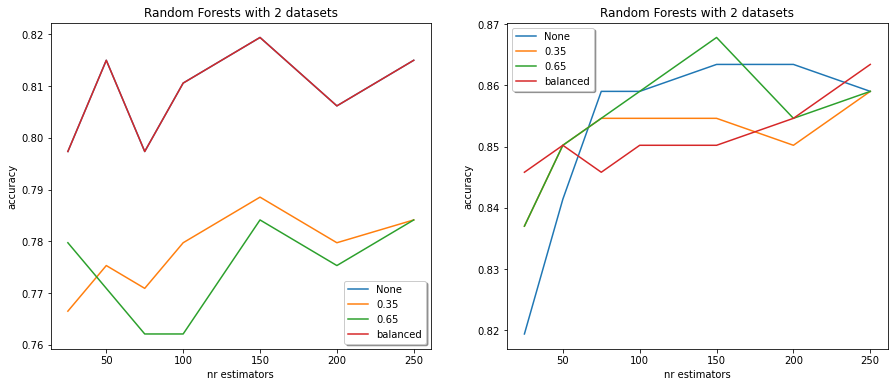

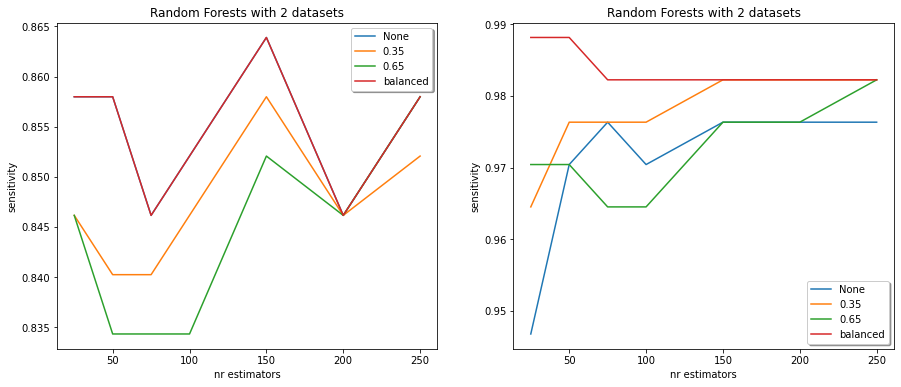

In [10]:
trnX, trnY, tstX, tstY, labels = data_smote
trnY, tstY = trnY.reshape(trnY.shape[0]), tstY.reshape(tstY.shape[0]) 

n_estimators = [25, 50, 75, 100, 150, 200, 250]
class_weights = [None, {1: 0.35}, {1: 0.65}, "balanced"]
names = ['None', 0.35 ,0.65, "balanced"]
datasets = [data_smote, data_unb]


plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(15, 6), squeeze=False)
fig2, axs2 = plt.subplots(1, 2, figsize=(15, 6), squeeze=False)
for k in range(len(datasets)):
    trnX, trnY, tstX, tstY, _ = datasets[k]
    trnY, tstY = trnY.reshape(trnY.shape[0]), tstY.reshape(tstY.shape[0]) 
    values = {}
    svalues = {}
    for i,d in enumerate(class_weights):
        yvalues = []
        syvalues=[]
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, max_features=max_features, 
                                    criterion=criterion, random_state=rs, min_samples_split= min_samples_split,
                                    class_weight=d)

            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            syvalues.append(func.sensitivity(tstY, prdY, labels))
        values[names[i]] = yvalues
        svalues[names[i]] = syvalues
    func.multiple_line_chart(axs[0, k], n_estimators, values, 'Random Forests with 2 datasets', 
                             'nr estimators', 'accuracy', percentage=False)
    func.multiple_line_chart(axs2[0, k], n_estimators, svalues, 'Random Forests with 2 datasets', 
                             'nr estimators', 'sensitivity', percentage=False)
    
plt.show()

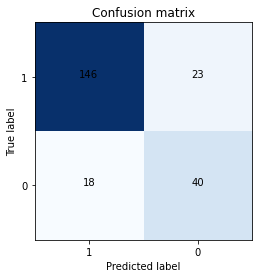

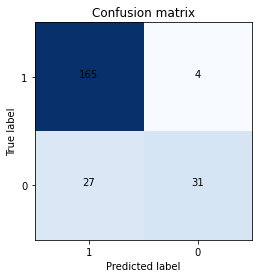

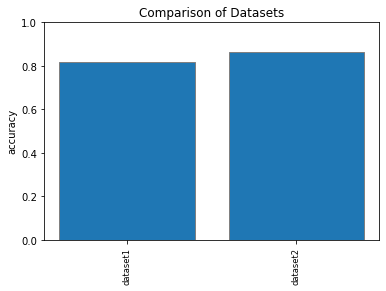

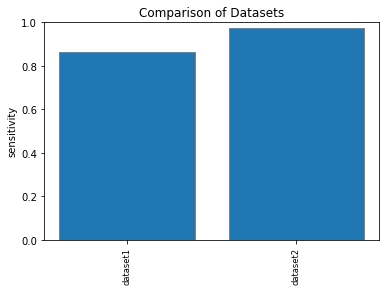

In [11]:
rf = RandomForestClassifier(n_estimators=150, max_depth=max_depth, max_features=max_features, 
                                    criterion=criterion, random_state=rs, min_samples_split= min_samples_split)
rf2 = RandomForestClassifier(n_estimators=150, max_depth=max_depth, max_features=max_features, 
                                    criterion=criterion, random_state=rs, min_samples_split= min_samples_split)
func.compare_datasets(rf, rf2, data_smote, data_unb)

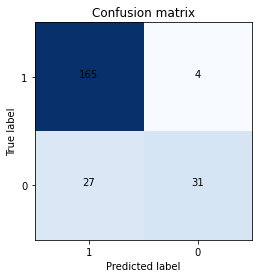

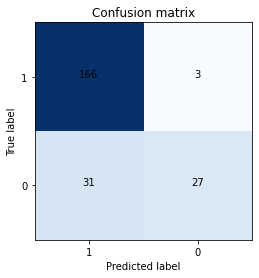

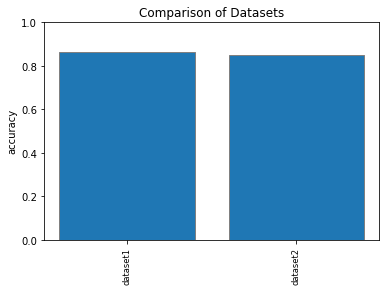

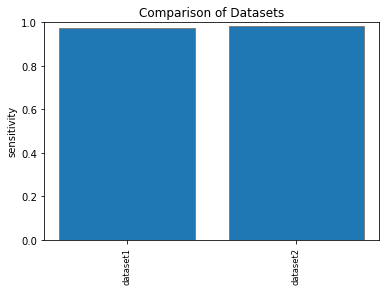

In [12]:
rf = RandomForestClassifier(n_estimators=150, max_depth=max_depth, max_features=max_features, 
                                    criterion=criterion, random_state=rs, min_samples_split= min_samples_split)
rf2 = RandomForestClassifier(n_estimators=150, max_depth=max_depth, max_features=max_features, 
                                    criterion=criterion, random_state=rs, min_samples_split= min_samples_split,
                                class_weight="balanced")
func.compare_datasets(rf, rf2, data_unb, data_unb)

<Figure size 432x288 with 0 Axes>

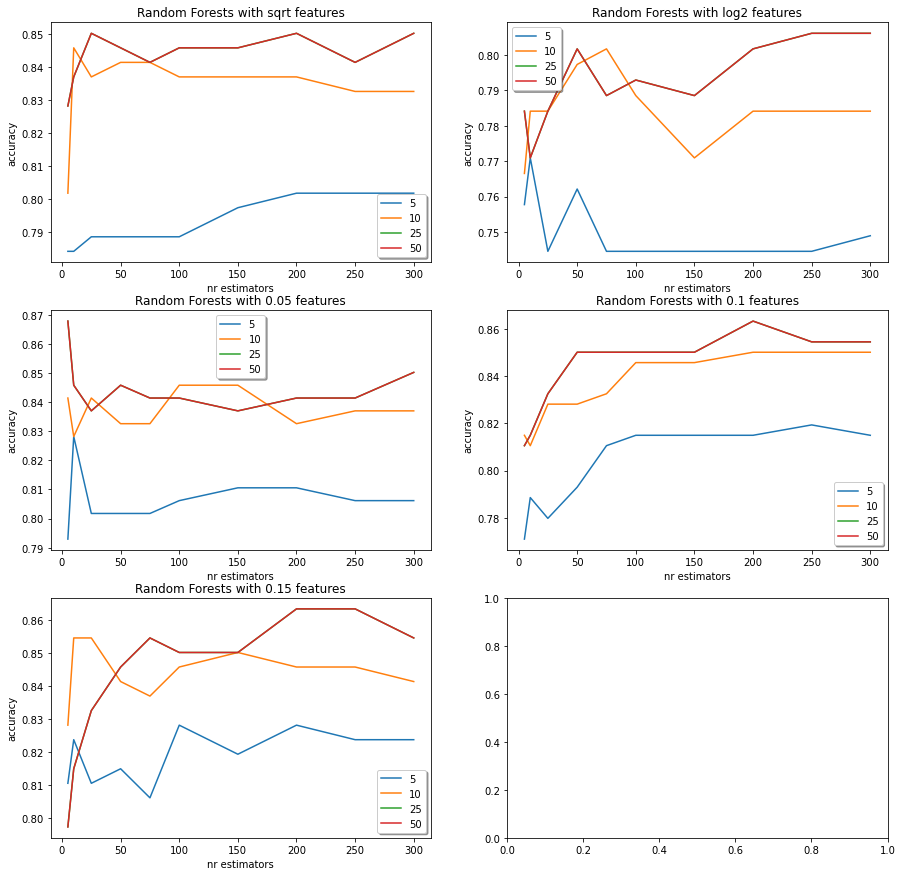

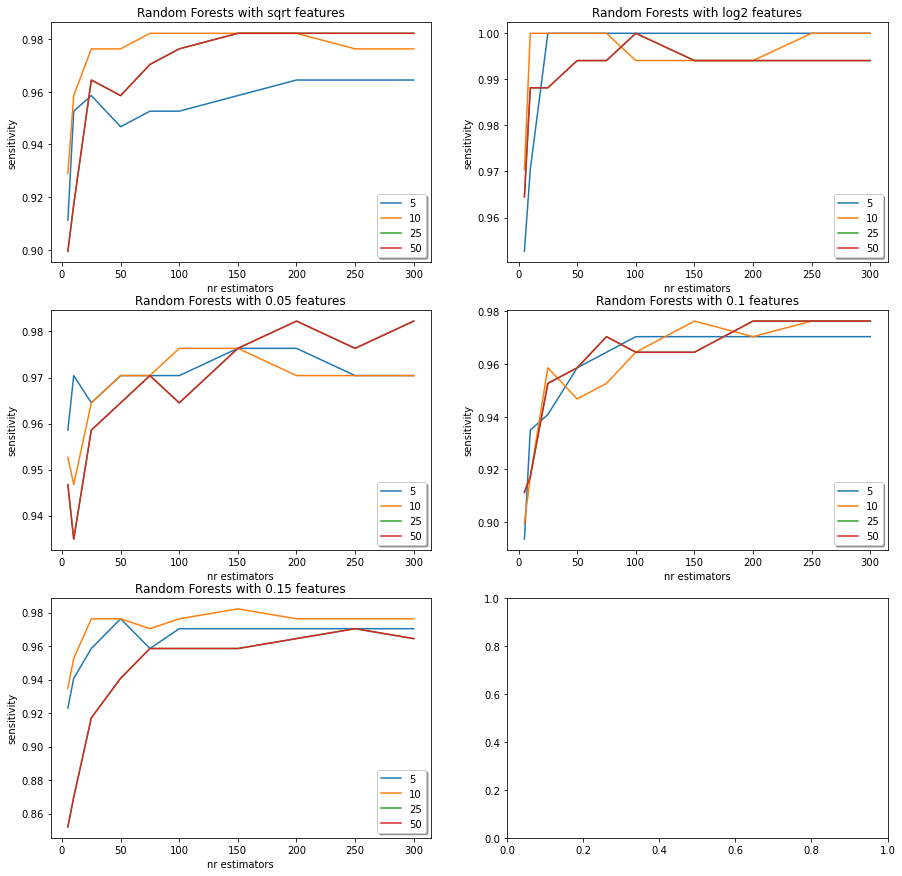

In [13]:

trnX, trnY, tstX, tstY, labels = data_unb
trnY, tstY = trnY.reshape(trnY.shape[0]), tstY.reshape(tstY.shape[0]) 

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25, 50]
max_features = ['sqrt', 'log2', 0.05, 0.1, 0.15]
a= math.ceil(len(max_features)/2)

plt.figure()
fig, axs = plt.subplots(a, 2, figsize=(15, 15), squeeze=False)
fig2, axs2 = plt.subplots(a, 2, figsize=(15, 15), squeeze=False)
for k in range(len(max_features)):
    f = max_features[k]
    values = {}
    svalues = {}
    for d in max_depths:
        yvalues = []
        syvalues = []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f,random_state=rs)
            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            syvalues.append(func.sensitivity(tstY, prdY, labels))
        values[d] = yvalues
        svalues[d] = syvalues
    func.multiple_line_chart(axs[k//2, k%2], n_estimators, values, 'Random Forests with %s features'%f, 'nr estimators', 
                             'accuracy', percentage=False)
    func.multiple_line_chart(axs2[k//2, k%2], n_estimators, svalues, 'Random Forests with %s features'%f, 
                             'nr estimators', 'sensitivity', percentage=False)
    
plt.show()

In [14]:
max_features = 0.15

<Figure size 432x288 with 0 Axes>

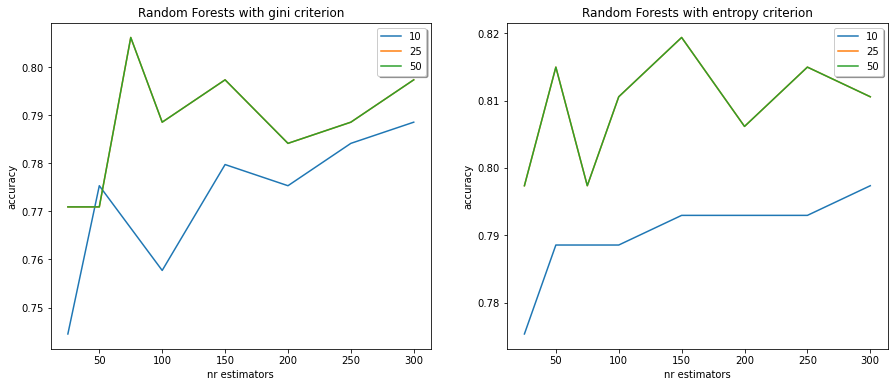

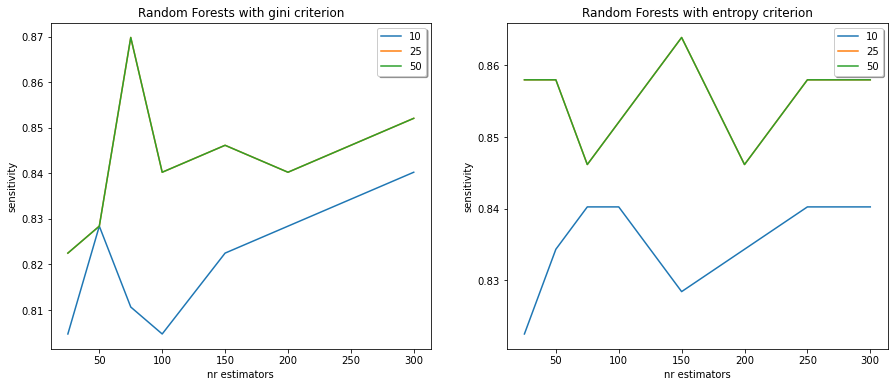

In [15]:
trnX, trnY, tstX, tstY, labels = data_smote
trnY, tstY = trnY.reshape(trnY.shape[0]), tstY.reshape(tstY.shape[0]) 

n_estimators = [25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [10, 25, 50]
criterions = ['gini', 'entropy']


a= math.ceil(len(criterions)/2)
plt.figure()
fig, axs = plt.subplots(a, 2, figsize=(15, 6), squeeze=False)
fig2, axs2 = plt.subplots(a, 2, figsize=(15, 6), squeeze=False)
for k in range(len(criterions)):
    f = criterions[k]
    values = {}
    svalues = {}
    for d in max_depths:
        yvalues = []
        syvalues = []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=max_features, criterion=f,
                                        random_state=rs)
            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            syvalues.append(func.sensitivity(tstY, prdY, labels))
        values[d] = yvalues
        svalues[d] = syvalues
    func.multiple_line_chart(axs[k//2, k%2], n_estimators, values, 'Random Forests with %s criterion'%f, 
                             'nr estimators', 'accuracy', percentage=False)
    func.multiple_line_chart(axs2[k//2, k%2], n_estimators, svalues, 'Random Forests with %s criterion'%f, 
                             'nr estimators', 'sensitivity', percentage=False)
    
plt.show()

In [16]:
criterion = "gini"
max_depth=50

<Figure size 432x288 with 0 Axes>

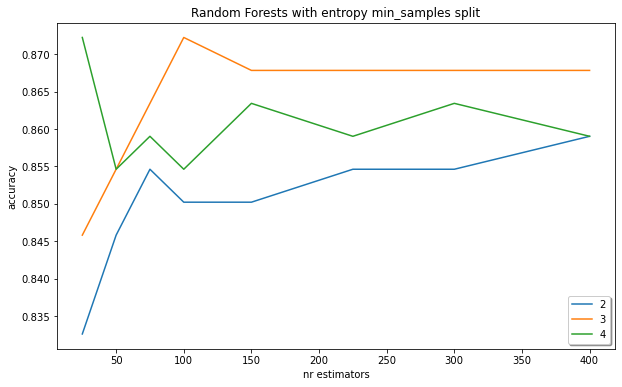

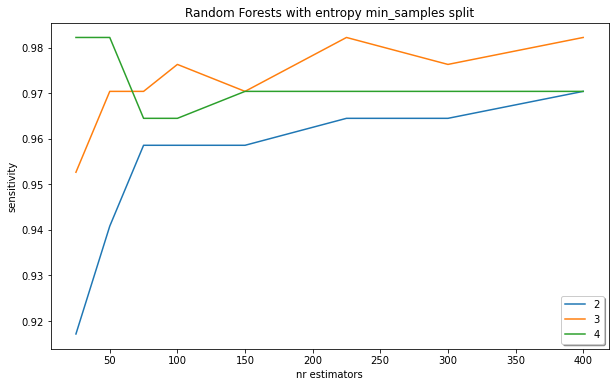

In [17]:
trnX, trnY, tstX, tstY, labels = data_unb
trnY, tstY = trnY.reshape(trnY.shape[0]), tstY.reshape(tstY.shape[0]) 

n_estimators = [25, 50, 75, 100, 150, 225, 300, 400]
min_samples_split = [2, 3, 4]


plt.figure()
fig, axs = plt.subplots(1, 1, figsize=(10, 6), squeeze=False)
fig2, axs2 = plt.subplots(1, 1, figsize=(10, 6), squeeze=False)
values = {}
svalues = {}
for d in min_samples_split:
    yvalues = []
    syvalues = []
    for n in n_estimators:
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, max_features=max_features, 
                                    criterion=criterion, random_state=rs, min_samples_split= d)
        rf.fit(trnX, trnY)
        prdY = rf.predict(tstX)
        yvalues.append(metrics.accuracy_score(tstY, prdY))
        syvalues.append(func.sensitivity(tstY, prdY, labels))
    values[d] = yvalues
    svalues[d] = syvalues
func.multiple_line_chart(axs[0,0], n_estimators, values, 'Random Forests with %s min_samples split'%f, 
                         'nr estimators', 'accuracy', percentage=False)
func.multiple_line_chart(axs2[0, 0], n_estimators, svalues, 'Random Forests with %s min_samples split'%f, 
                             'nr estimators', 'sensitivity', percentage=False)

plt.show()

In [18]:
min_samples_split=4

<Figure size 432x288 with 0 Axes>

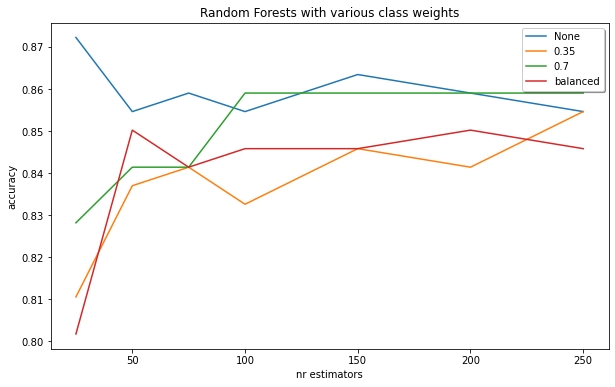

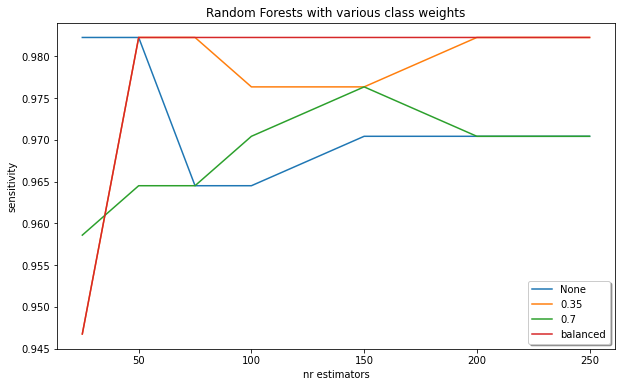

In [19]:
#{class_label: weight}

trnX, trnY, tstX, tstY, labels = data_unb
trnY, tstY = trnY.reshape(trnY.shape[0]), tstY.reshape(tstY.shape[0]) 

n_estimators = [25, 50, 75, 100, 150, 200, 250]
class_weights = [None, {1: 0.35}, {1: 0.70}, "balanced"]
names = ['None', 0.35 ,0.70, "balanced"]

plt.figure()
fig, axs = plt.subplots(1, 1, figsize=(10, 6), squeeze=False)
fig2, axs2 = plt.subplots(1, 1, figsize=(10, 6), squeeze=False)
values = {}
svalues = {}
for i,d in enumerate(class_weights):
    yvalues = []
    syvalues = []
    for n in n_estimators:
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, max_features=max_features, 
                                criterion=criterion, random_state=rs, min_samples_split= min_samples_split,
                                class_weight=d)
        
        rf.fit(trnX, trnY)
        prdY = rf.predict(tstX)
        yvalues.append(metrics.accuracy_score(tstY, prdY))
        syvalues.append(func.sensitivity(tstY, prdY, labels))
    values[names[i]] = yvalues
    svalues[names[i]] = syvalues
func.multiple_line_chart(axs[0,0], n_estimators, values, 'Random Forests with various class weights', 
                         'nr estimators', 'accuracy', percentage=False)
func.multiple_line_chart(axs2[0, 0], n_estimators, svalues, 'Random Forests with various class weights', 
                             'nr estimators', 'sensitivity', percentage=False)

plt.show()

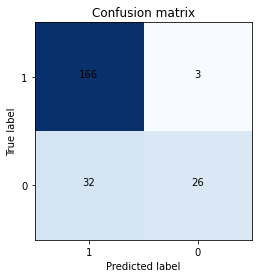

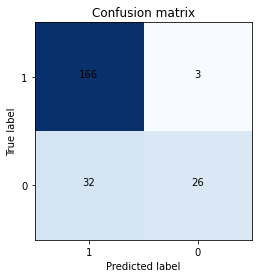

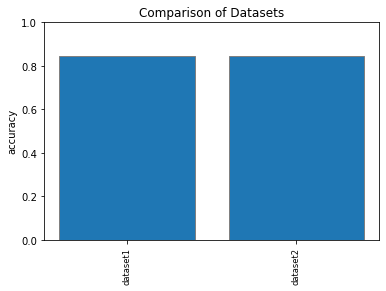

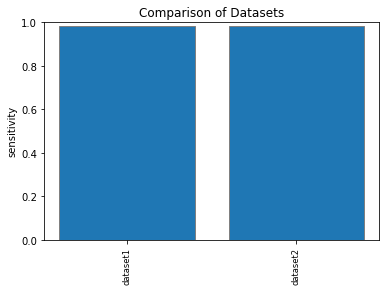

In [20]:
rf = RandomForestClassifier(n_estimators=250, max_depth=max_depth, max_features=max_features, 
                                criterion=criterion, random_state=rs, min_samples_split= min_samples_split,
                                class_weight="balanced")
func.compare_datasets(rf, rf, data_unb, data_unb)